In [1]:
#from google.colab import drive

In [2]:
#drive.mount('/content/drive/')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns


%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

Data Dictionary:

Variable Name 	Description
Carat 	 Carat weight of the cubic zirconia.

Cut 	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color  	 Colour of the cubic zirconia.With D being the worst and J the best.

Clarity 	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, IF = flawless, l1= level 1 inclusion) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

Depth 	 The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table 	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price 	 the Price of the cubic zirconia.

X 	 Length of the cubic zirconia in mm.

Y 	 Width of the cubic zirconia in mm.

Z 	 Height of the cubic zirconia in mm.

1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [4]:
df_gem = pd.read_csv("cubic_zirconia.csv")

In [5]:
df_gem.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df_gem.shape

(26967, 11)

In [7]:
df_gem.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,NaN,NaN,NaN,13484.0,7784.846691,1.0,6742.5,13484.0,20225.5,26967.0
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8


**observations:**


*   price of the gem ranges from 326 to 3939.52
*   there are 5 unique cuts with ideal being the most frequent 10816
*   there are 7 unique colors with G being the most frequent 5661
*   there are 8 unique clarity with SI1 being most frequent 6571
*   Carat weight of the cubic zirconia ranges from 0.2 to 4.5







In [8]:
df_gem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [9]:

#df_gem['cut'] = pd.to_numeric(df_gem['cut'],errors = 'coerce')
#df_gem['cut'].astype(str).astype(int)
#df_gem["cut"] = df_gem["cut"].astype(str).astype(int)
#df_gem['cut'] = df_gem['cut'].astype('int')
#pd.to_numeric(df_gem['cut'], errors='coerce')
#df_gem['color'] = pd.to_numeric(df_gem['color'],errors = 'coerce')
#df_gem["color"] = df_gem["color"].astype(str).astype(int)
#df_gem['color'] = df_gem['color'].astype('int')
#pd.to_numeric(df_gem['color'], errors='coerce')
#df_gem['clarity'] = pd.to_numeric(df_gem['clarity'],errors = 'coerce')
#df_gem["clarity"] = df_gem["clarity"].astype(str).astype(int)
#df_gem['clarity'] = df_gem['clarity'].astype('int')
#pd.to_numeric(df_gem['clarity'], errors='coerce')




In [10]:
df_gem.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [11]:
#df_gem['cut'].value_counts().sort_values()
df_gem['cut'].value_counts(normalize=True)

Ideal        0.401083
Premium      0.255831
Very Good    0.223607
Good         0.090518
Fair         0.028961
Name: cut, dtype: float64

In [12]:

df_gem.groupby('cut')['price'].mean().sort_values()

cut
Ideal        3454.119730
Good         3930.581729
Very Good    4034.462852
Premium      4548.263806
Fair         4579.248399
Name: price, dtype: float64

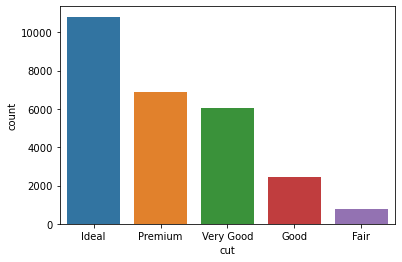

In [13]:
#ax = sns.barplot(x="cut", y="price", data=df_gem, estimator=sum)
#ax = sns.countplot(x="cut", hue="price", data=df_gem)
ax = sns.countplot(x="cut", data=df_gem)

In [14]:
df_gem.color.value_counts().sort_values()

J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64

In [15]:

df_gem.groupby('color')['price'].mean().sort_values()

color
E    3073.946715
D    3185.961423
F    3699.880313
G    4002.694400
H    4486.713554
I    5129.830386
J    5331.453915
Name: price, dtype: float64

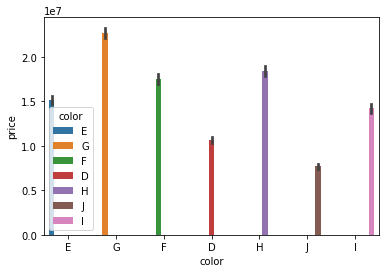

In [16]:
ax = sns.barplot(x="color", y="price", hue="color", data=df_gem, estimator=sum)

In [17]:
df_gem.clarity.value_counts().sort_values()

I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64

In [18]:

df_gem.groupby('clarity')['price'].mean().sort_values()

clarity
VVS1    2502.874388
IF      2734.222595
VVS2    3265.279336
VS1     3838.876130
I1      3906.547945
VS2     3968.759961
SI1     3998.155228
SI2     5095.000437
Name: price, dtype: float64

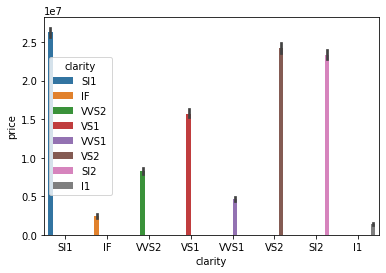

In [19]:
ax = sns.barplot(x="clarity", y="price", hue="clarity", data=df_gem, estimator=sum)

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [20]:
df_gem.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [21]:
df_gem.isna().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [22]:
# Are there any duplicates ?
dups = df_gem.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df_gem[dups]

Number of duplicate rows = 0


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price


In [23]:
mean_value=df_gem['depth'].mean()
df_gem['depth'].fillna(value=mean_value, inplace=True)
#df_gem['depth'].fillna(int(df_gem['depth'].mean()), inplace=True)

In [24]:
df_gem.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [25]:
df_gem.cut.value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

In [26]:

df_gem["cut"] = df_gem["cut"].astype('category')
df_gem["color"] = df_gem["color"].astype('category')
df_gem["clarity"] = df_gem["clarity"].astype('category')

df_gem["cut"] = df_gem["cut"].cat.codes
df_gem["color"] = df_gem["color"].cat.codes
df_gem["clarity"] = df_gem["clarity"].cat.codes

In [27]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_gem[column].describe(),end=' ')
    
    
    plt.figure()
    sns.set(style = 'whitegrid')
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(data=df_gem, x=df_gem[column], kde=True)
    plt.show()
    
    plt.figure()
    sns.set(style = 'whitegrid')
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_gem[column])

    plt.show()

In [28]:
df_num2 = df_gem.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num2.columns.values)
len(lstnumericcolumns)

8

Description of Unnamed: 0
----------------------------------------------------------------------------
count    26967.000000
mean     13484.000000
std       7784.846691
min          1.000000
25%       6742.500000
50%      13484.000000
75%      20225.500000
max      26967.000000
Name: Unnamed: 0, dtype: float64 Distribution of Unnamed: 0
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

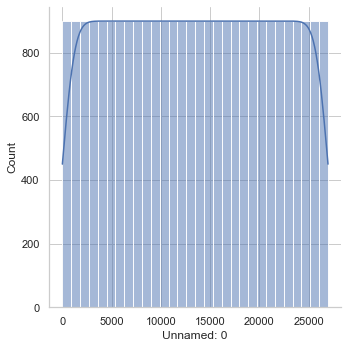

BoxPlot of Unnamed: 0
----------------------------------------------------------------------------


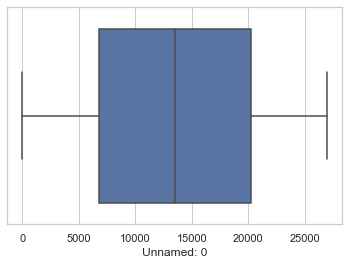

Description of carat
----------------------------------------------------------------------------
count    26967.000000
mean         0.798375
std          0.477745
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64 Distribution of carat
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

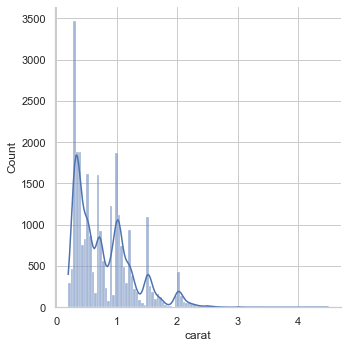

BoxPlot of carat
----------------------------------------------------------------------------


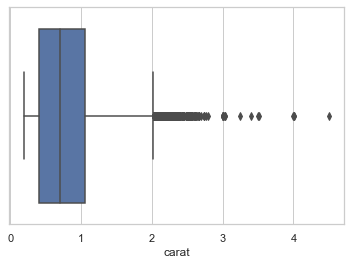

Description of depth
----------------------------------------------------------------------------
count    26967.000000
mean        61.745147
std          1.394481
min         50.800000
25%         61.100000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64 Distribution of depth
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

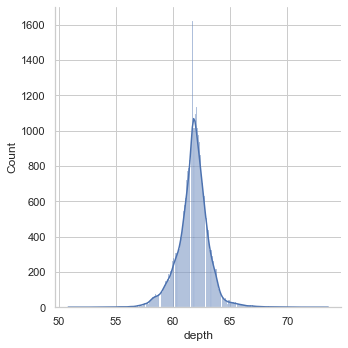

BoxPlot of depth
----------------------------------------------------------------------------


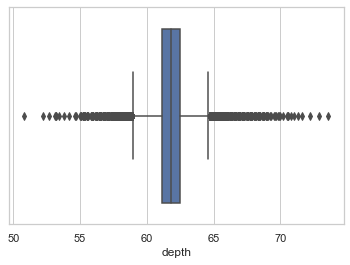

Description of table
----------------------------------------------------------------------------
count    26967.000000
mean        57.456080
std          2.232068
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64 Distribution of table
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

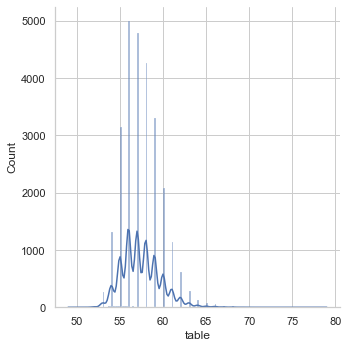

BoxPlot of table
----------------------------------------------------------------------------


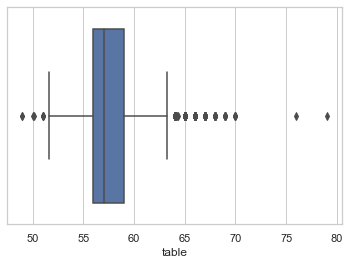

Description of x
----------------------------------------------------------------------------
count    26967.000000
mean         5.729854
std          1.128516
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64 Distribution of x
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

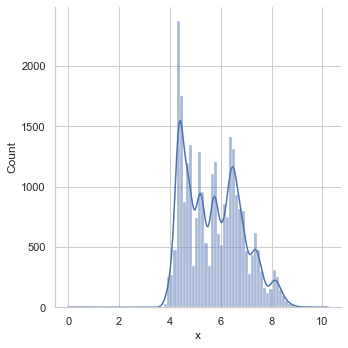

BoxPlot of x
----------------------------------------------------------------------------


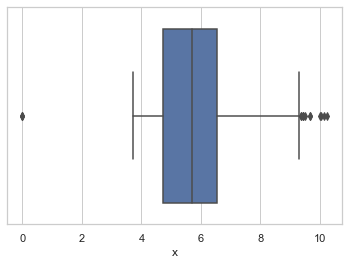

Description of y
----------------------------------------------------------------------------
count    26967.000000
mean         5.733569
std          1.166058
min          0.000000
25%          4.710000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64 Distribution of y
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

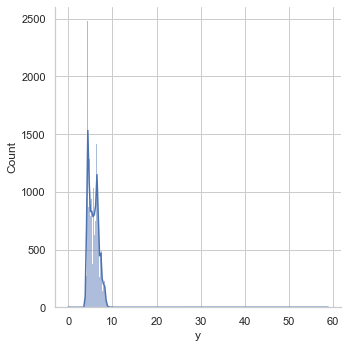

BoxPlot of y
----------------------------------------------------------------------------


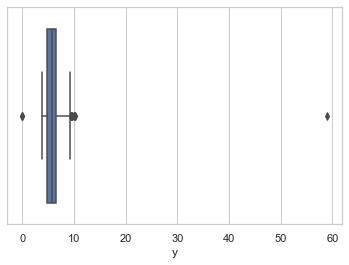

Description of z
----------------------------------------------------------------------------
count    26967.000000
mean         3.538057
std          0.720624
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64 Distribution of z
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

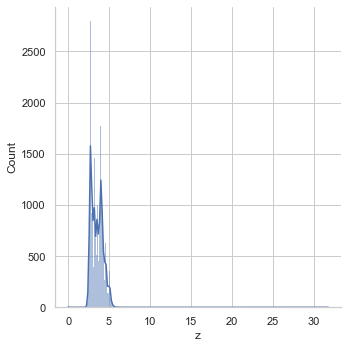

BoxPlot of z
----------------------------------------------------------------------------


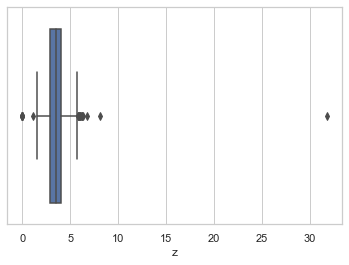

Description of price
----------------------------------------------------------------------------
count    26967.000000
mean      3939.518115
std       4024.864666
min        326.000000
25%        945.000000
50%       2375.000000
75%       5360.000000
max      18818.000000
Name: price, dtype: float64 Distribution of price
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

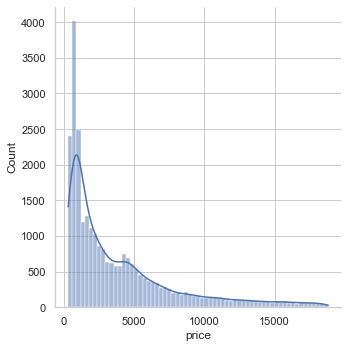

BoxPlot of price
----------------------------------------------------------------------------


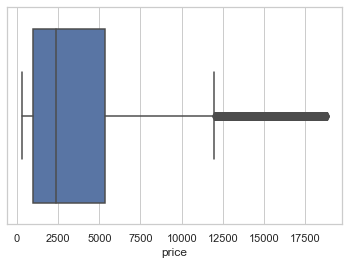

In [29]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [30]:
# skewness along the index axis
df_gem.skew(axis = 0, skipna = True)

Unnamed: 0    0.000000
carat         1.116481
cut          -0.180112
color         0.188719
clarity       0.178479
depth        -0.028995
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

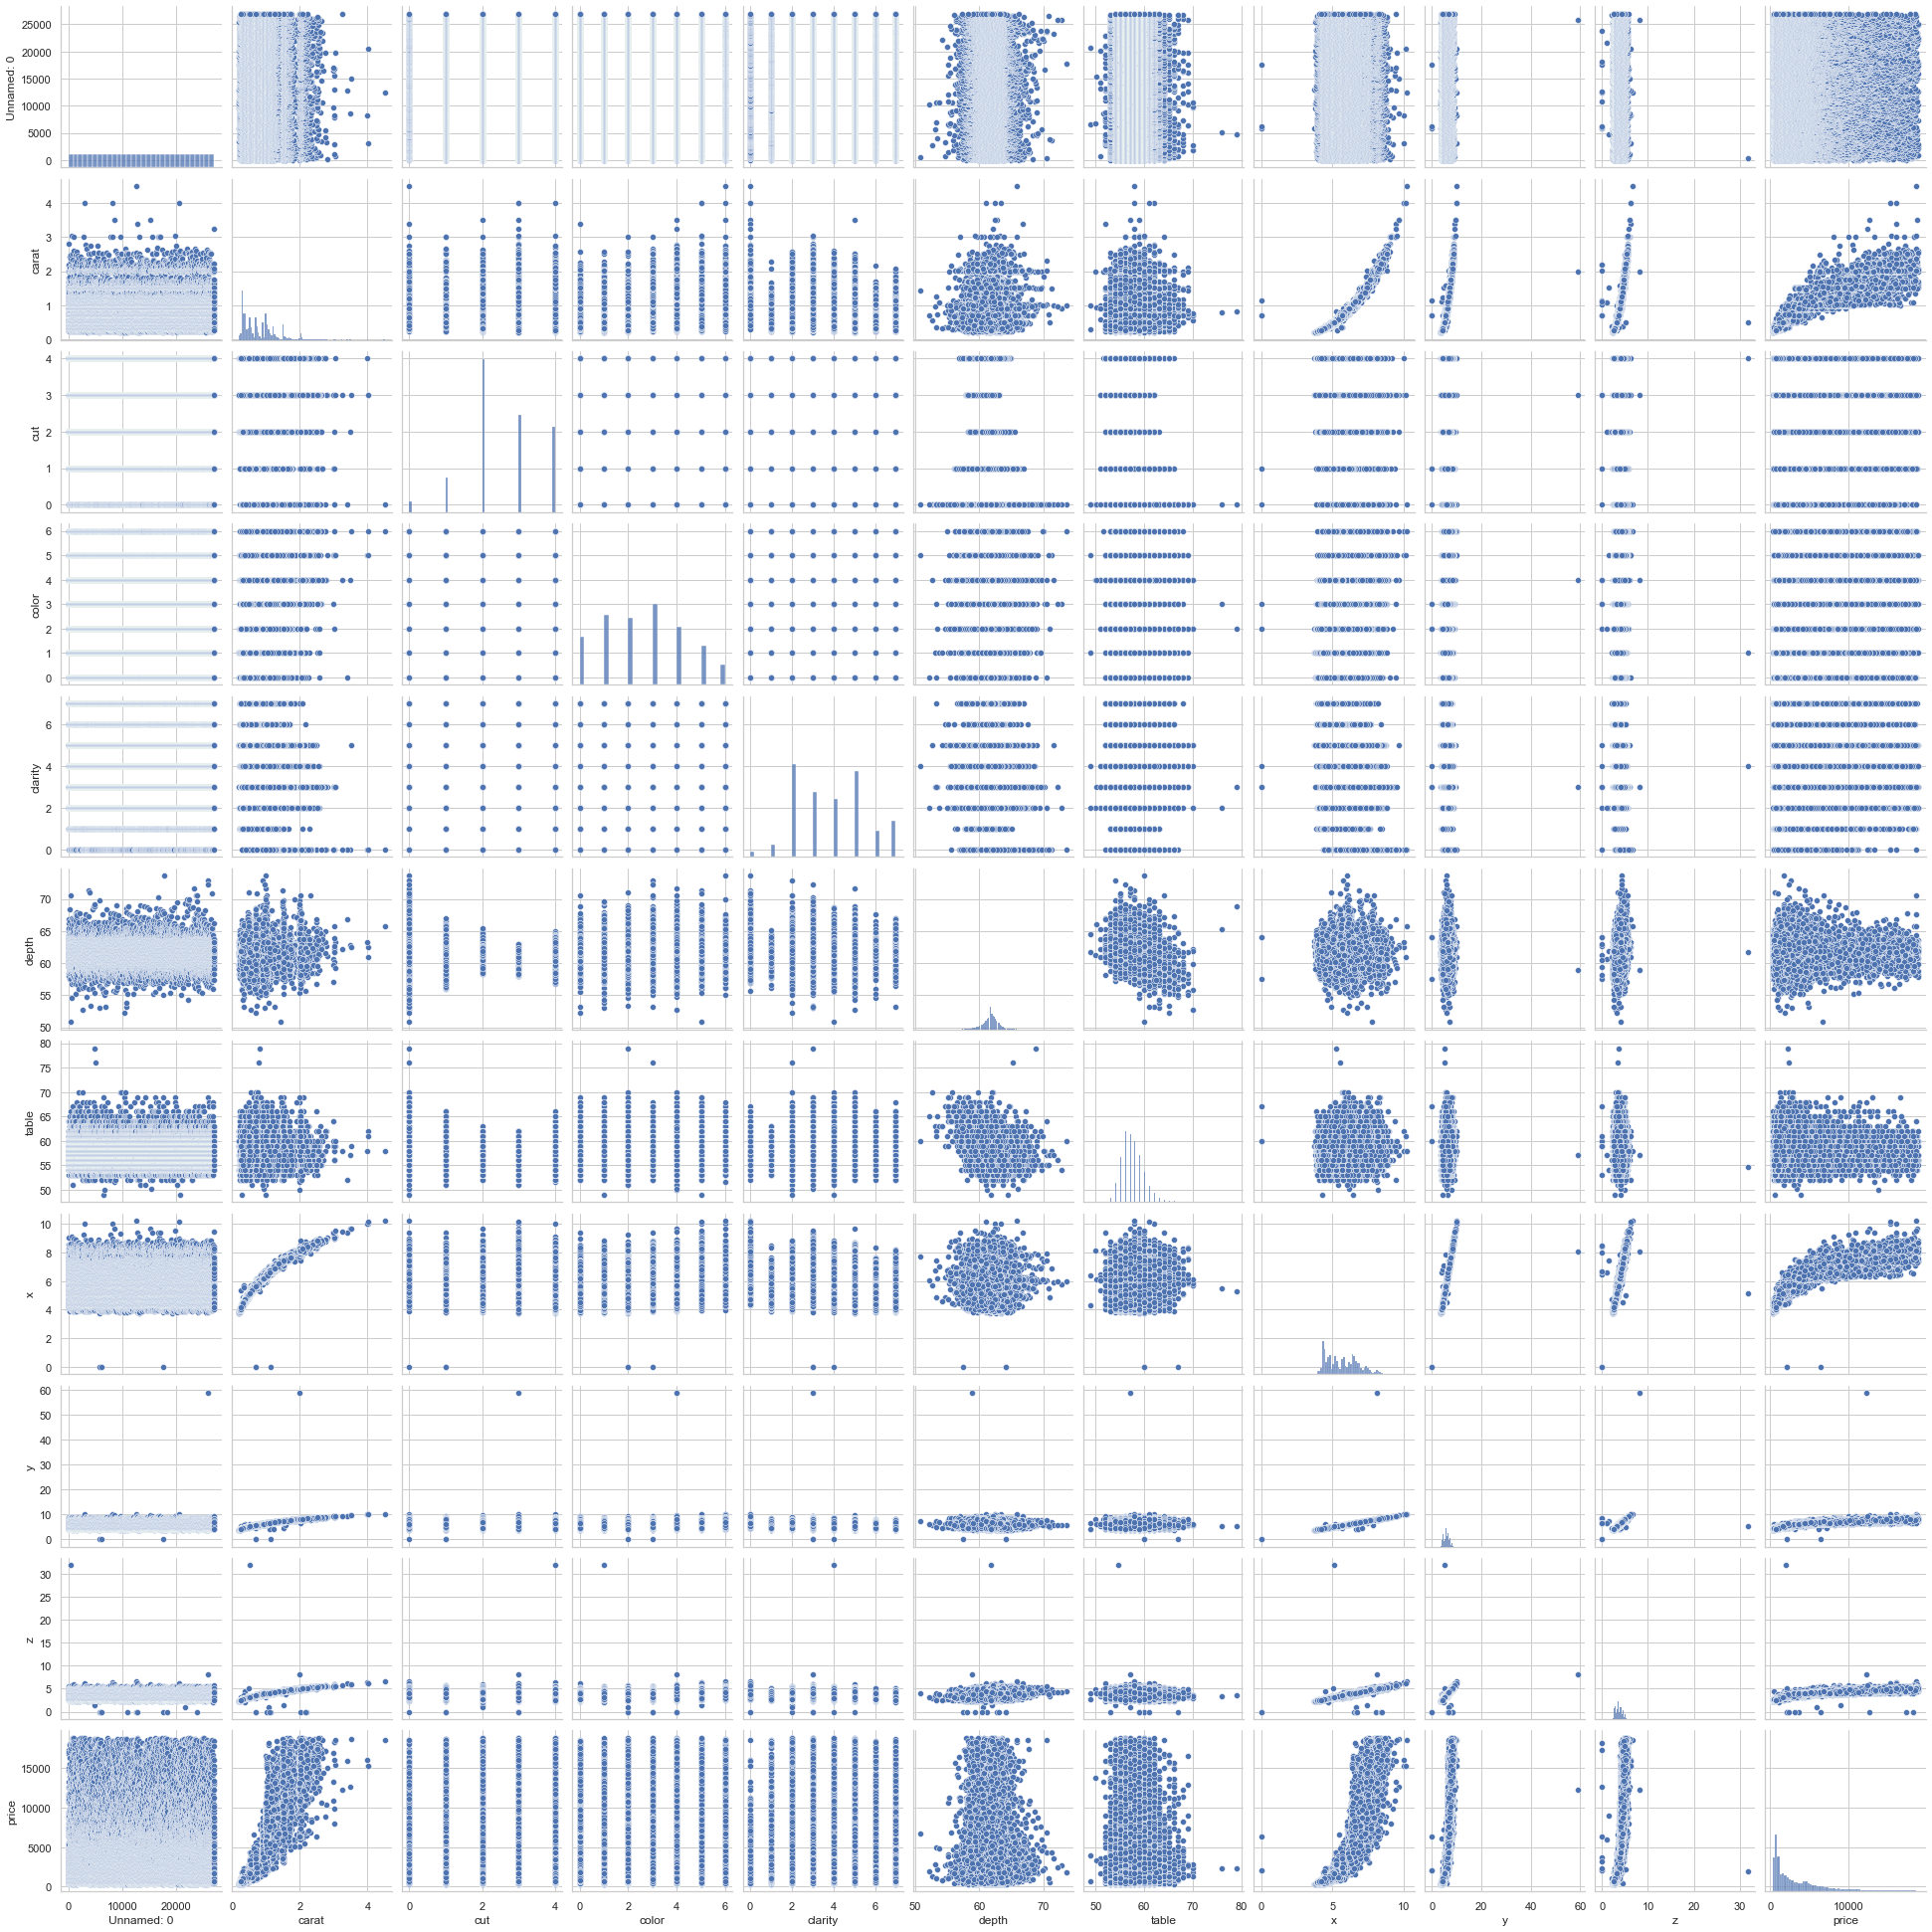

In [31]:
sns.pairplot(df_gem)
plt.show()

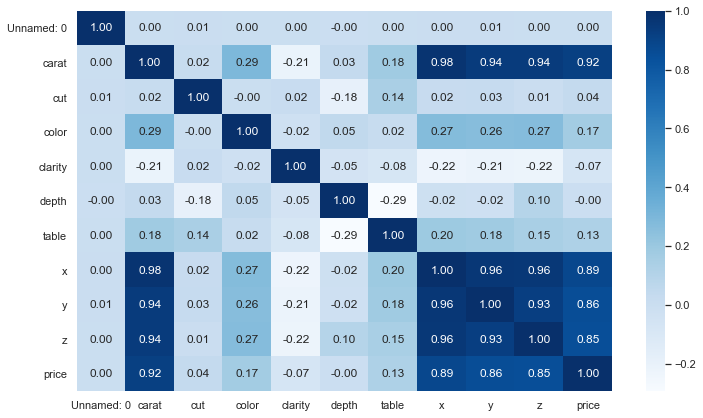

In [32]:
plt.figure(figsize=(12,7))
sns.heatmap(df_gem.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

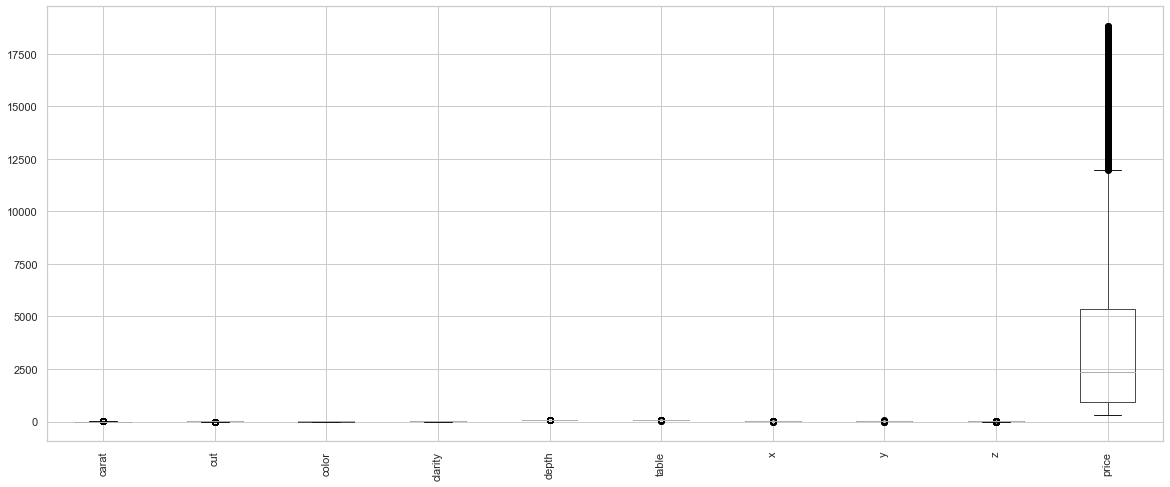

In [33]:
df_gem.drop('Unnamed: 0', axis='columns', inplace=True)
df_gem.boxplot(figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

In [34]:
data_outlier=df_gem.copy()

In [35]:
# Defining a funtion to remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [36]:
#capping and flooring of outliers with upper and lower bounds respectively
for column in data_outlier.columns:
    if data_outlier[column].dtype != 'object':
        lr,ur=remove_outlier(data_outlier[column])
        data_outlier[column]=np.where(data_outlier[column]>ur,ur,data_outlier[column])
        data_outlier[column]=np.where(data_outlier[column]<lr,lr,data_outlier[column])

In [37]:
#data_outlier.drop('Unnamed: 0', axis='columns', inplace=True)

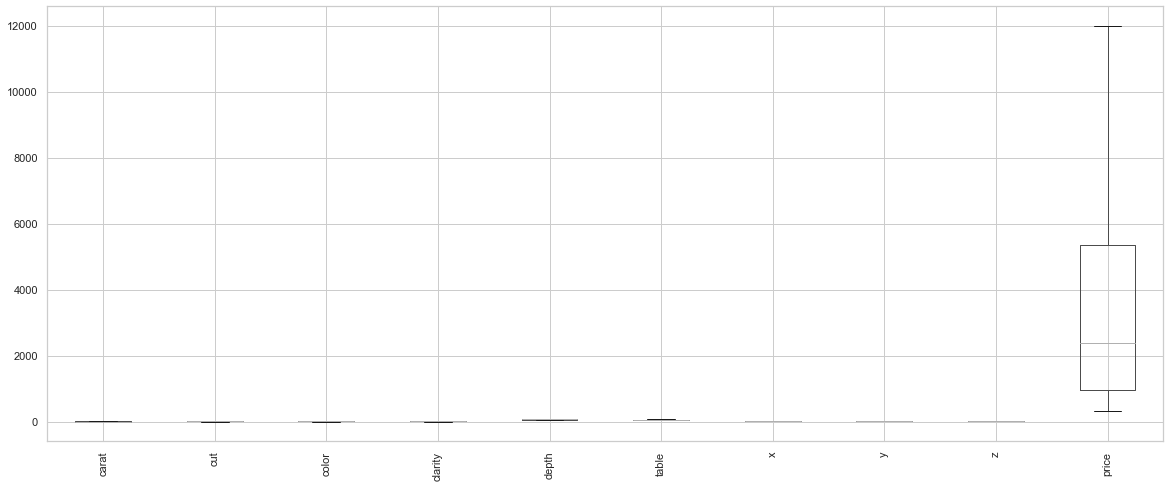

In [38]:
#data_outlier.drop(['Unnamed: 0'],axis=1)
#data_outlier.drop(['Unnamed: 0'], axis = 1)
data_outlier.boxplot(figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

In [39]:
#copying the outlier treated dataframe into new variable
data_feature = data_outlier.copy()
data_feature.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2.0,1.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,1.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,4.0,1.0,7.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,2.0,2.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,2.0,2.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0


<AxesSubplot:>

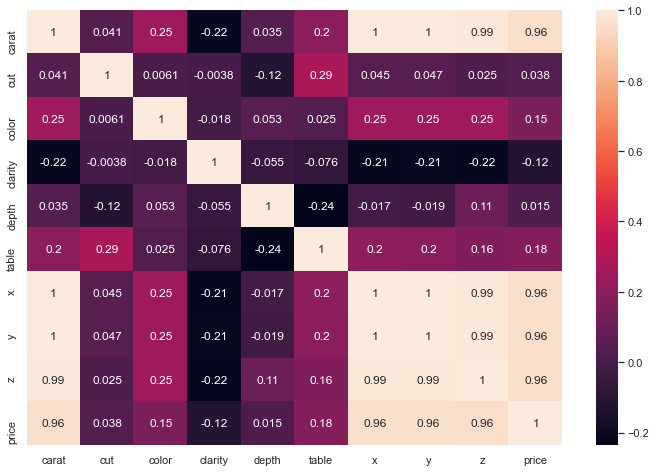

In [40]:
#checking correlation plot for multi collinearity check
plt.figure(figsize=(12,8))
sns.heatmap(data_feature.corr(method='spearman'),annot=True)

1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [41]:
data_feature.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.793593,0.462431,0.200,0.40,0.70,1.05,2.025
cut,26967.0,2.569084,0.991019,0.500,2.00,2.00,3.00,4.000
color,26967.0,2.606111,1.705992,0.000,1.00,3.00,4.00,6.000
clarity,26967.0,3.833537,1.724904,0.000,2.00,4.00,5.00,7.000
depth,26967.0,61.749085,1.218903,59.000,61.10,61.80,62.50,64.600
table,26967.0,57.435699,2.157125,51.500,56.00,57.00,59.00,63.500
x,26967.0,5.729903,1.127023,1.950,4.71,5.69,6.55,9.310
y,26967.0,5.731798,1.118970,1.965,4.71,5.71,6.54,9.285
z,26967.0,3.537261,0.697278,1.190,2.90,3.52,4.04,5.750
price,26967.0,3737.914136,3470.888236,326.000,945.00,2375.00,5360.00,11982.500


In [42]:
data_feature.cut.value_counts()

2.0    10816
3.0     6899
4.0     6030
1.0     2441
0.5      781
Name: cut, dtype: int64

### Train-Test Split

In [43]:
# Copy all the predictor variables into X dataframe
X = data_feature.drop(['price'], axis=1)

# Copy target into the y dataframe. 
y = data_feature[['price']]

In [44]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Linear Regression Model

In [45]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model=regression_model.fit(X_train, y_train)

In [46]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9179.770941716366
The coefficient for cut is 35.016659638680544
The coefficient for color is -227.78232631138513
The coefficient for clarity is 249.4230222679398
The coefficient for depth is -93.28168568503094
The coefficient for table is -75.08555478355487
The coefficient for x is -2129.5083711932093
The coefficient for y is 1626.3629461676016
The coefficient for z is -261.3095464311368


In [47]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 9889.094474729785


In [48]:
# R square on training data
regression_model.score(X_train, y_train)

0.9103119017894044

In [49]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9075236531515751

In [50]:
#RMSE on Training data
predicted_train=regression_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1041.6969633311749

In [51]:
#RMSE on Testing data
predicted_test=regression_model.predict(X_test)
predicted_test
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1050.1062997718977

### Linear Regression using statsmodels

In [52]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11687,0.41,2.0,5.0,7.0,62.3,56.0,4.77,4.73,2.96,1061.0
9728,1.71,2.0,6.0,2.0,62.8,57.0,7.58,7.55,4.75,6320.0
1936,0.33,1.0,2.0,2.0,61.8,62.0,4.40,4.45,2.74,536.0
26220,0.70,4.0,4.0,2.0,62.8,57.0,5.61,5.66,3.54,2214.0
18445,0.70,2.0,0.0,3.0,62.1,56.0,5.67,5.71,3.53,2575.0


In [53]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [54]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y  + z'

In [55]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    9889.094475
carat        9179.770942
cut            35.016660
color        -227.782326
clarity       249.423022
depth         -93.281686
table         -75.085555
x           -2129.508371
y            1626.362946
z            -261.309546
dtype: float64

In [56]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.128e+04
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:14:26   Log-Likelihood:            -1.5795e+05
No. Observations:               18876   AIC:                         3.159e+05
Df Residuals:                   18866   BIC:                         3.160e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9889.0945    703.594     14.055      0.0

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [57]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [58]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1041.696963331177

In [59]:
np.sqrt(lm1.mse_resid) #another way

1041.973004612044

In [60]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

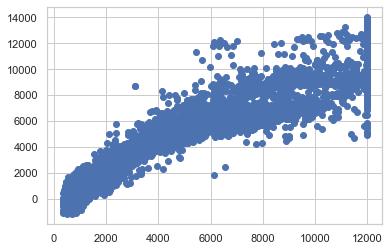

In [61]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [62]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(9889.09) * Intercept + (9179.77) * carat + (35.02) * cut + (-227.78) * color + (249.42) * clarity + (-93.28) * depth + (-75.09) * table + (-2129.51) * x + (1626.36) * y + (-261.31) * z + 

 # Conclusion

The final Linear Regression equation is  
  
<b>price = b0 + b1 * instant_bookable[T.True] + b2 * carat + b3 * cut + b4 * color + b5 * clarity + b6 * depth + b7 * table + b8 * x + b9 * y + b10 * z </b>
  
<b>price = (9889.09) * Intercept + (0) * instant_bookable[T.True] + (9179.77) * carat + (35.02) * cut + (-227.78) * color + (249.42) * clarity + (-93.28) * depth + (-75.09) * table + (-2129.51) * x + (1626.36) * y + (-261.31) * z </b>  
  
When carat increases by 1 unit, price increases by 9179.77 units, keeping all other predictors constant.  
similarly, when cut increases by 1 unit, price increases by 35.02 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, color has its corresponding co-efficient as -227.78. This implies, when there is change in color , the price decreases by 227.78 units, keeping all other predictors constant.



In [63]:
# Copy all the predictor variables into X dataframe
X = data_feature.drop(['price'], axis=1)

# Copy target into the y dataframe. 
y = data_feature[['price']]

In [64]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [65]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [66]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model=regression_model.fit(X_train_scaled, y_train_scaled)

In [67]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.220089055434781
The coefficient for cut is 0.010014460199874127
The coefficient for color is -0.11169688784019112
The coefficient for clarity is 0.12318015990538583
The coefficient for depth is -0.03275312453968245
The coefficient for table is -0.04644920883379383
The coefficient for x is -0.6895587468858497
The coefficient for y is 0.5229485578062489
The coefficient for z is -0.05238050004466743


In [68]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -6.526120532878867e-16


In [69]:
# R square on training data
regression_model.score(X_train_scaled, y_train_scaled)

0.9103119017894044

In [70]:
# R square on testing data
regression_model.score(X_test_scaled, y_test_scaled)

0.9076826092045978

In [71]:
#RMSE on Training data
predicted_train=regression_model.predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

0.2994797125192217

In [72]:
#RMSE on Testing data
predicted_test=regression_model.predict(X_test_scaled)
predicted_test
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

0.30383777052137917

In [73]:
# concatenate X and y into a single dataframe
data_train_scaled = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_test_scaled =pd.concat([X_test_scaled,y_test_scaled],axis=1)
data_train_scaled.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11687,-0.828710,-0.579125,1.401996,1.852795,0.449410,-0.669095,-0.851279,-0.895171,-0.827069,-0.770767
9728,1.983254,-0.579125,1.988276,-1.057867,0.858802,-0.204361,1.643548,1.626182,1.740161,0.741155
1936,-1.001754,-1.584373,-0.356843,-1.057867,0.040018,2.119307,-1.179779,-1.145518,-1.142594,-0.921700
26220,-0.201426,1.431371,0.815717,-1.057867,0.858802,-0.204361,-0.105494,-0.063661,0.004771,-0.439288
18445,-0.201426,-0.579125,-1.529403,-0.475735,0.285653,-0.669095,-0.052224,-0.018956,-0.009571,-0.335503


In [74]:
data_train_scaled.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [75]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y  + z'

In [76]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train_scaled).fit()
lm1.params

Intercept    1.214306e-17
carat        1.220089e+00
cut          1.001446e-02
color       -1.116969e-01
clarity      1.231802e-01
depth       -3.275312e-02
table       -4.644921e-02
x           -6.895587e-01
y            5.229486e-01
z           -5.238050e-02
dtype: float64

In [77]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.128e+04
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:14:26   Log-Likelihood:                -4024.9
No. Observations:               18876   AIC:                             8070.
Df Residuals:                   18866   BIC:                             8148.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.214e-17      0.002   5.57e-15      1.0

In [78]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train_scaled.drop('price',axis=1))-data_train_scaled['price'])**2)

In [79]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.29947971251922223

In [80]:
np.sqrt(lm1.mse_resid) #another way

0.2995590722239613

In [81]:
# Prediction on Test data
y_pred = lm1.predict(data_test_scaled)

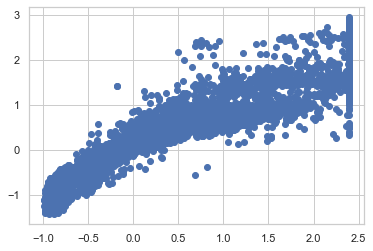

In [82]:
plt.scatter(y_test_scaled['price'], y_pred)
plt.show()

In [83]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (1.22) * carat + (0.01) * cut + (-0.11) * color + (0.12) * clarity + (-0.03) * depth + (-0.05) * table + (-0.69) * x + (0.52) * y + (-0.05) * z + 

 # Conclusion

The final Linear Regression equation is  
  
<b>price = b0 + b1 * instant_bookable[T.True] + b2 * carat + b3 * cut + b4 * color + b5 * clarity + b6 * depth + b7 * table + b8 * x + b9 * y + b10 * z </b>
  
<b>price = (0.0) * Intercept + (0) * instant_bookable[T.True] + (1.22) * carat + (0.01) * cut + (-0.11) * color + (0.12) * clarity + (-0.03) * depth + (-0.05) * table + (-0.69) * x + (0.52) * y + (-0.05) * z </b>  
  
When carat increases by 1 unit, price increases by 1.22 units, keeping all other predictors constant.  
similarly, when cut increases by 1 unit, price increases by 0.01 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, color has its corresponding co-efficient as -0.11. This implies, when there is change in color , the price decreases by 0.11 units, keeping all other predictors constant.



1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Data Dictionary:

Variable Name 	Description

Holiday_Package  	 Opted for Holiday Package yes/no?

Salary  	 Employee salary

age  	 Age in years

edu  	 Years of formal education

no_young_children  	 The number of young children (younger than 7 years)

no_older_children  	 Number of older children

foreign  	 foreigner Yes/No

 

In [84]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
import numpy as np
# calculate accuracy measures and confusion matrix
from sklearn import metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [85]:
df_pkg = pd.read_csv("Holiday_Package.csv")

In [86]:
df_pkg.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [87]:
df_pkg.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [88]:
df_pkg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [89]:
df_pkg.shape

(872, 8)

In [90]:
df_pkg.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [91]:
df_pkg.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [92]:
df_pkg.no_young_children.value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [93]:
df_pkg.no_older_children.value_counts()

0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

In [94]:
df_pkg.foreign.value_counts()

no     656
yes    216
Name: foreign, dtype: int64

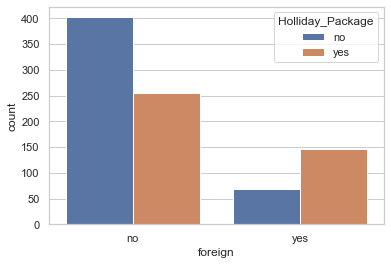

In [95]:
ax = sns.countplot(x="foreign", hue="Holliday_Package", data=df_pkg)

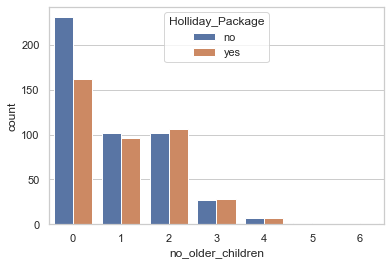

In [96]:
ax = sns.countplot(x="no_older_children", hue="Holliday_Package", data=df_pkg)

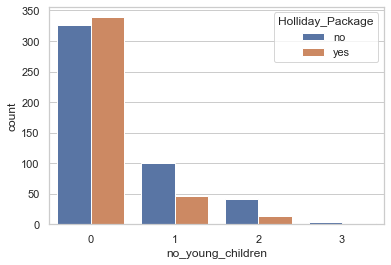

In [97]:
ax = sns.countplot(x="no_young_children", hue="Holliday_Package", data=df_pkg)

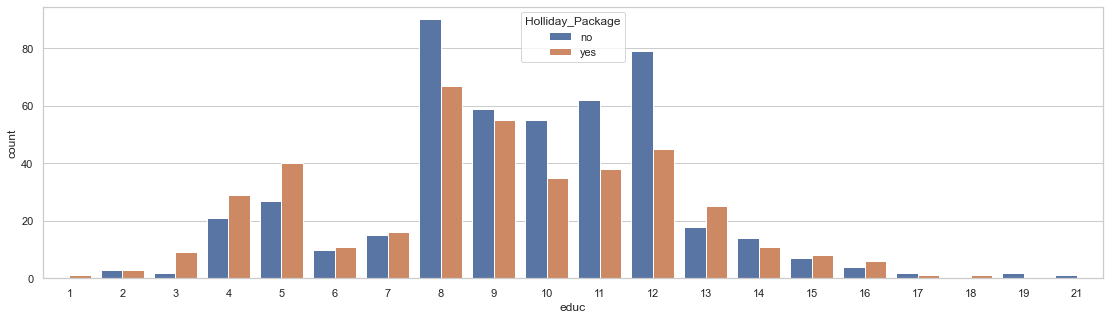

In [98]:
countplot, ax = plt.subplots(figsize = (19,5))
ax =sns.countplot(x = 'educ', data=df_pkg,hue="Holliday_Package")

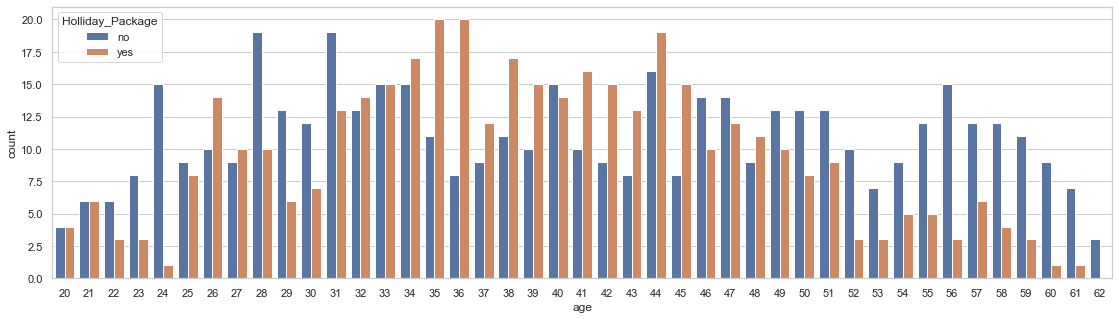

In [99]:
countplot, ax = plt.subplots(figsize = (19,5))
ax =sns.countplot(x = 'age', data=df_pkg,hue="Holliday_Package")

2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [100]:
for feature in df_pkg.columns: 
    if df_pkg[feature].dtype == 'object':
        df_pkg[feature] = pd.Categorical(df_pkg[feature]).codes

In [101]:
df_pkg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         872 non-null    int64
 1   Holliday_Package   872 non-null    int8 
 2   Salary             872 non-null    int64
 3   age                872 non-null    int64
 4   educ               872 non-null    int64
 5   no_young_children  872 non-null    int64
 6   no_older_children  872 non-null    int64
 7   foreign            872 non-null    int8 
dtypes: int64(6), int8(2)
memory usage: 42.7 KB


In [102]:
df_pkg.Holliday_Package.value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [103]:
df_pkg.isnull().sum()
#df=df.dropna()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [104]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_pkg[column].describe(),end=' ')
    
    
    plt.figure()
    sns.set(style = 'whitegrid')
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(data=df_pkg, x=df_pkg[column], kde=True)
    plt.show()
    
    plt.figure()
    sns.set(style = 'whitegrid')
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_pkg[column])

    plt.show()

In [105]:
df_num2 = df_pkg.select_dtypes(include = ['float64', 'int64','int8'])
lstnumericcolumns = list(df_num2.columns.values)
len(lstnumericcolumns)

8

Description of Unnamed: 0
----------------------------------------------------------------------------
count    872.000000
mean     436.500000
std      251.869014
min        1.000000
25%      218.750000
50%      436.500000
75%      654.250000
max      872.000000
Name: Unnamed: 0, dtype: float64 Distribution of Unnamed: 0
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

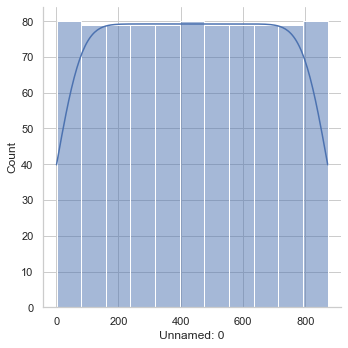

BoxPlot of Unnamed: 0
----------------------------------------------------------------------------


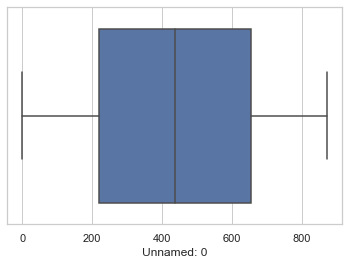

Description of Holliday_Package
----------------------------------------------------------------------------
count    872.000000
mean       0.459862
std        0.498672
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Holliday_Package, dtype: float64 Distribution of Holliday_Package
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

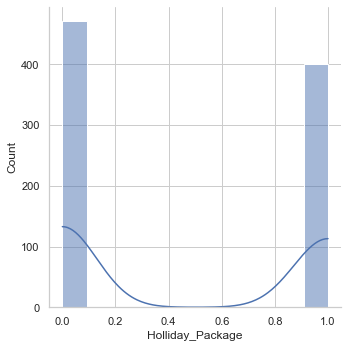

BoxPlot of Holliday_Package
----------------------------------------------------------------------------


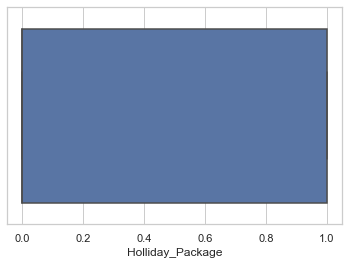

Description of Salary
----------------------------------------------------------------------------
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64 Distribution of Salary
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

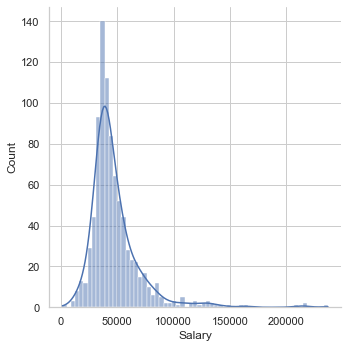

BoxPlot of Salary
----------------------------------------------------------------------------


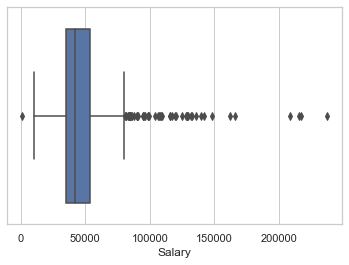

Description of age
----------------------------------------------------------------------------
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

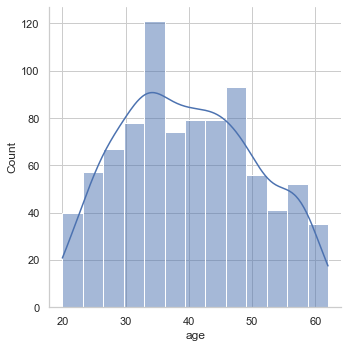

BoxPlot of age
----------------------------------------------------------------------------


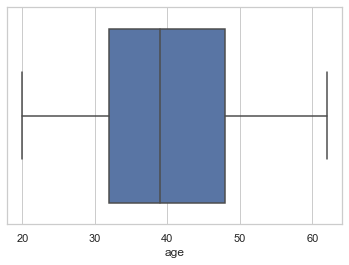

Description of educ
----------------------------------------------------------------------------
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64 Distribution of educ
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

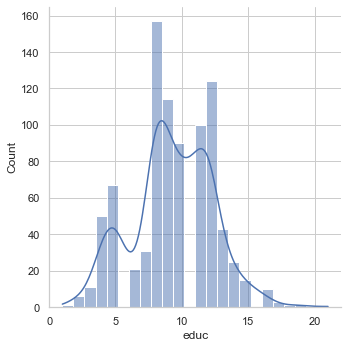

BoxPlot of educ
----------------------------------------------------------------------------


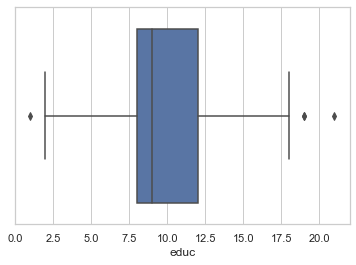

Description of no_young_children
----------------------------------------------------------------------------
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64 Distribution of no_young_children
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

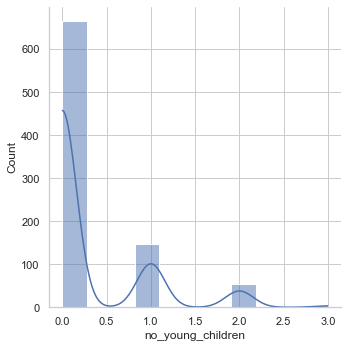

BoxPlot of no_young_children
----------------------------------------------------------------------------


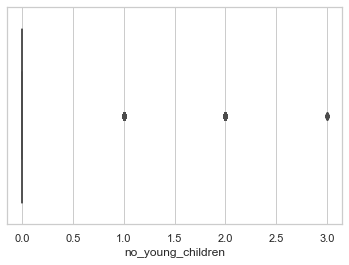

Description of no_older_children
----------------------------------------------------------------------------
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64 Distribution of no_older_children
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

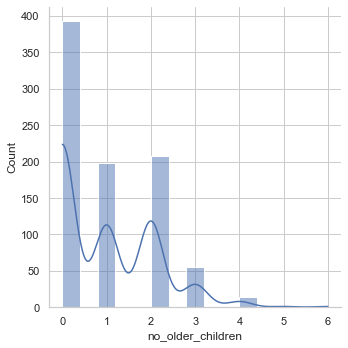

BoxPlot of no_older_children
----------------------------------------------------------------------------


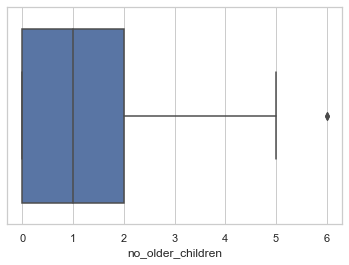

Description of foreign
----------------------------------------------------------------------------
count    872.000000
mean       0.247706
std        0.431928
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: foreign, dtype: float64 Distribution of foreign
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

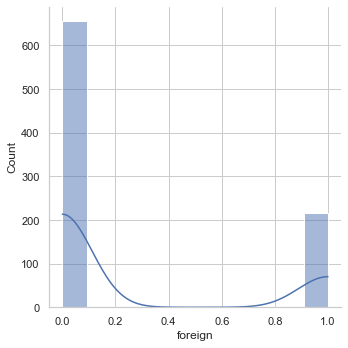

BoxPlot of foreign
----------------------------------------------------------------------------


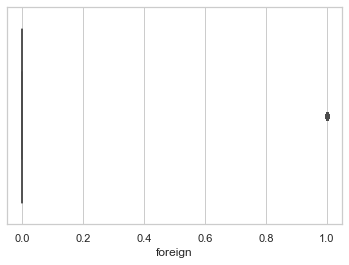

In [106]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

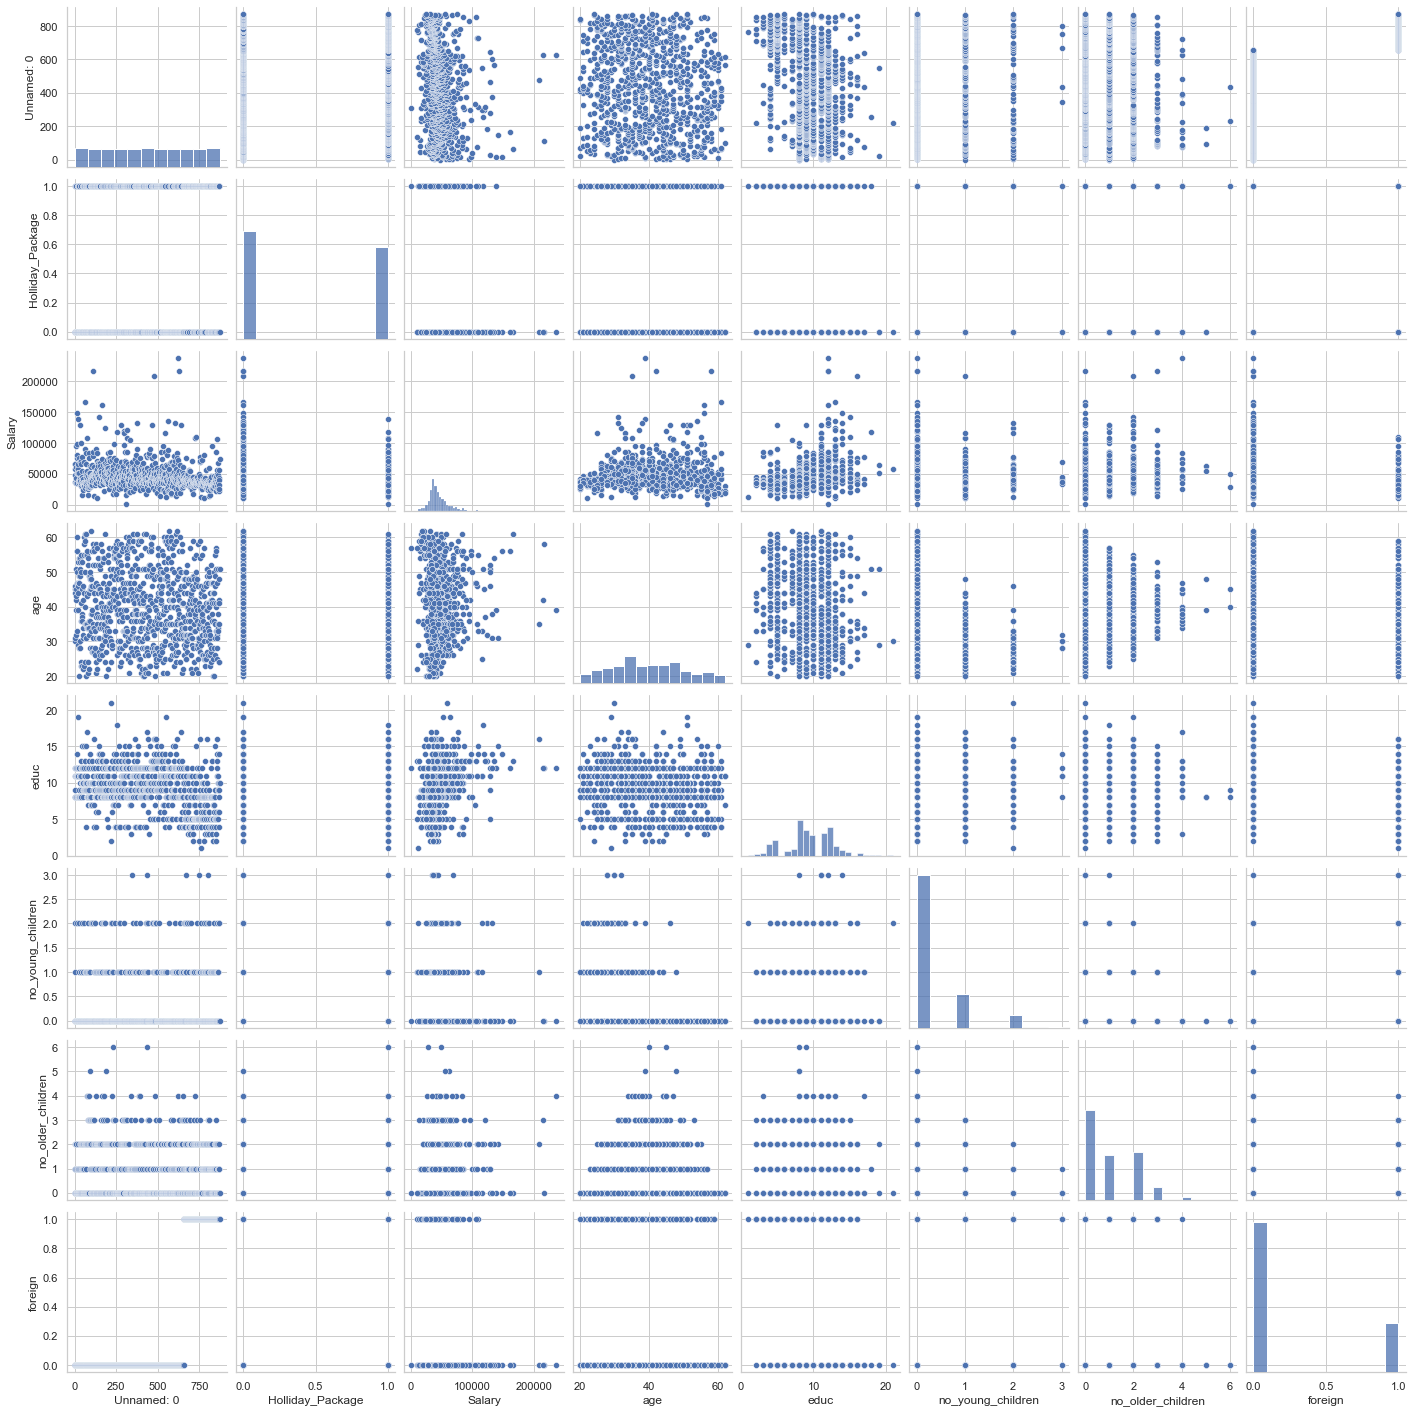

In [107]:
sns.pairplot(df_pkg)
plt.show()

<AxesSubplot:>

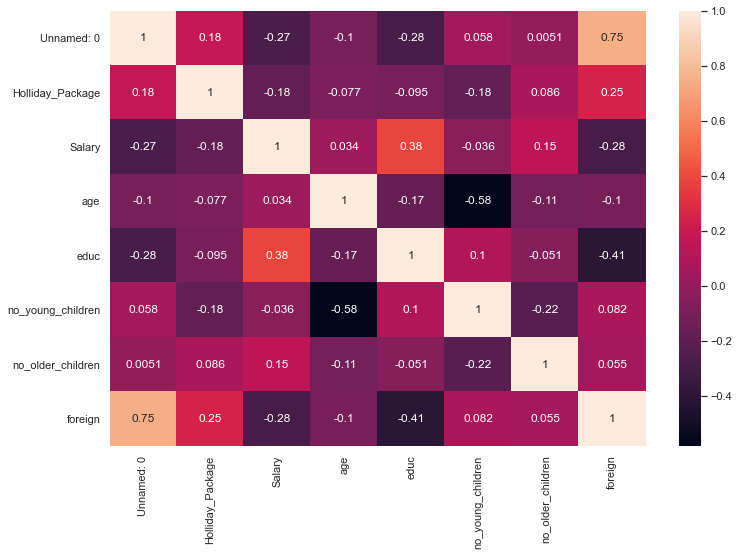

In [108]:
#checking correlation plot for multi collinearity check
plt.figure(figsize=(12,8))
sns.heatmap(df_pkg.corr(method='spearman'),annot=True)

In [109]:
no_outlier = ['Unnamed: 0','Holliday_Package','age','Channel','no_young_children','no_older_children','foreign']
outlier_list = [x for x in df_pkg.columns if x not in no_outlier]



In [110]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
#    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    mean_value = np.mean(x)
    median_value = np.median(x)
#    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q75 if y > upper_bound else y).apply(lambda y: q25 if y < lower_bound else y)


In [111]:
for i in df_pkg[outlier_list]:    
    df_pkg[i]=treat_outlier(df_pkg[i])

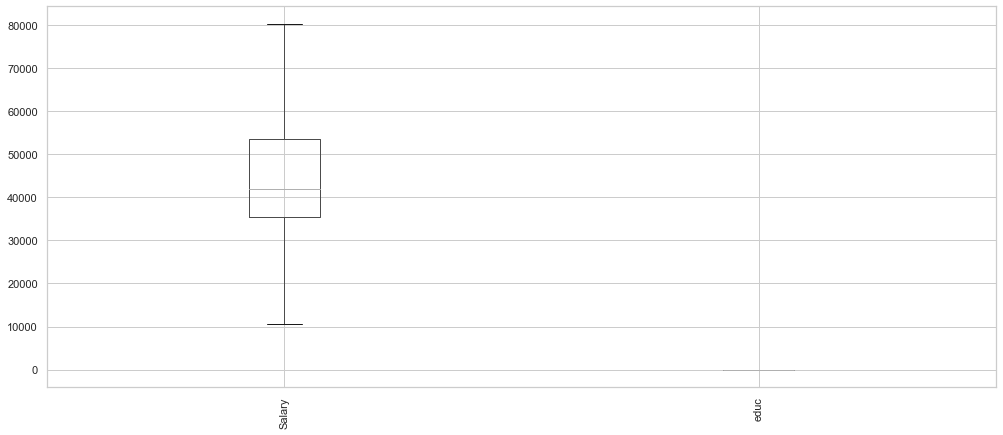

In [112]:
df_pkg.boxplot(figsize=(17,7),column=['Salary','educ'])
plt.xticks(rotation=90)
plt.show()

In [113]:
df_pkg.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.250,872.0
Holliday_Package,872.0,0.459862,0.498672,0.0,0.00,0.0,1.000,1.0
Salary,872.0,43891.589450,12918.724797,10551.0,35328.50,41903.5,53450.375,80297.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.000,62.0
educ,872.0,9.288991,2.965391,2.0,8.00,9.0,12.000,18.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.000,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.000,6.0
foreign,872.0,0.247706,0.431928,0.0,0.00,0.0,0.000,1.0


In [114]:
df_pkg.Holliday_Package.value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

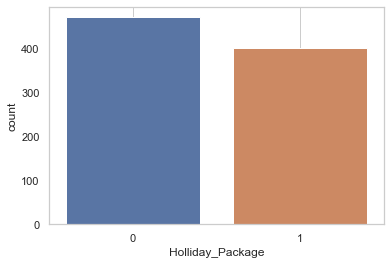

In [115]:
sns.countplot(df_pkg.Holliday_Package)
plt.grid()
plt.show()

In [116]:
# Copy all the predictor variables into X dataframe
X = df_pkg.drop(['Unnamed: 0','Holliday_Package'], axis=1)

# Copy target into the y dataframe. 
y = df_pkg[['Holliday_Package']]

In [117]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df_pkg['Holliday_Package'])

In [118]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [119]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [120]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.696027,0.303973
1,0.534119,0.465881
2,0.708162,0.291838
3,0.493199,0.506801
4,0.581898,0.418102


In [121]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6573770491803279

AUC: 0.731


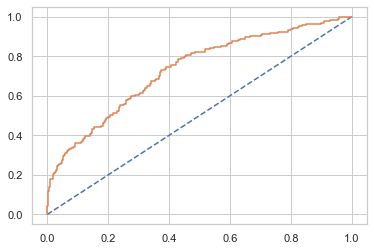

In [122]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [123]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6603053435114504

AUC: 0.731


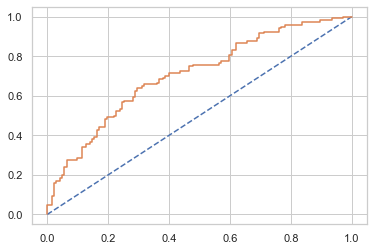

In [124]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [125]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [124, 157]], dtype=int64)

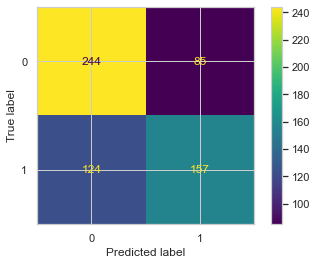

In [126]:
plot_confusion_matrix(model,X_train,y_train);

In [127]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       329
           1       0.65      0.56      0.60       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.65       610



In [128]:
confusion_matrix(y_test, ytest_predict)

array([[110,  32],
       [ 57,  63]], dtype=int64)

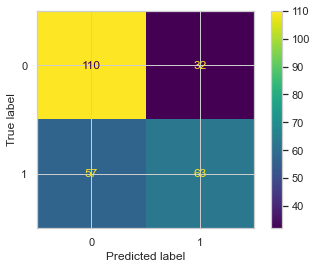

In [129]:
plot_confusion_matrix(model,X_test,y_test);

In [130]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       142
           1       0.66      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262



In [131]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [132]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [133]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [134]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [135]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [136]:
best_model = grid_search.best_estimator_

In [137]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [138]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.531032,0.468968
1,0.549515,0.450485
2,0.535060,0.464940
3,0.543990,0.456010
4,0.563762,0.436238


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610
 



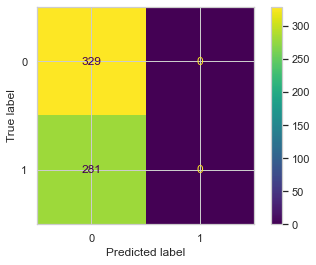

In [139]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262
 



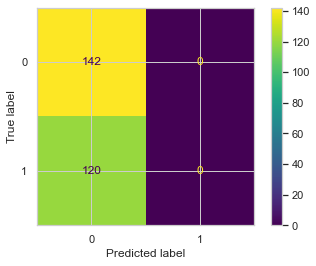

In [140]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### LDA 

In [141]:
X = df_pkg.drop(['Unnamed: 0','Holliday_Package'], axis=1)
Y = df_pkg.pop('Holliday_Package')

In [142]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [143]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


### LDA Model

In [144]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

### Prediction

In [145]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

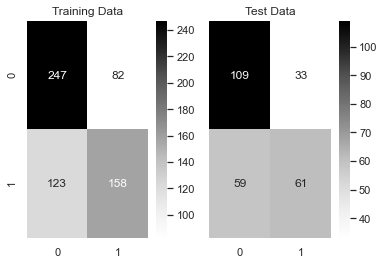

In [146]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison

In [147]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.56      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.70       142
           1       0.65      0.51      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



### Probability prediction for the training and test data


In [148]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [149]:
pred_prob_train[:,1]


array([0.7185408 , 0.28181979, 0.38649771, 0.74963891, 0.46455481,
       0.40382873, 0.3590996 , 0.29753613, 0.60362765, 0.63547654,
       0.23038344, 0.25468604, 0.35028014, 0.04323546, 0.37839082,
       0.35784674, 0.53629809, 0.30041826, 0.57660389, 0.64243249,
       0.62014814, 0.2520779 , 0.8807095 , 0.31663069, 0.08726077,
       0.81881414, 0.28996843, 0.75455579, 0.51371526, 0.18288404,
       0.3074596 , 0.32161623, 0.37103945, 0.37639939, 0.31610987,
       0.27509981, 0.1069807 , 0.67775078, 0.47385433, 0.19422209,
       0.32493999, 0.80112198, 0.49929552, 0.73978222, 0.78982117,
       0.36708284, 0.29498363, 0.93232711, 0.42868571, 0.71616639,
       0.71727048, 0.44850565, 0.78054072, 0.36270109, 0.19401455,
       0.73905706, 0.24555094, 0.49627181, 0.65966198, 0.32760493,
       0.60307574, 0.65433752, 0.51353546, 0.4105236 , 0.55148585,
       0.6007474 , 0.12032491, 0.55569942, 0.40310689, 0.26076411,
       0.33143028, 0.73562985, 0.77124806, 0.21248454, 0.44370

AUC for the Training Data: 0.729
AUC for the Test Data: 0.704


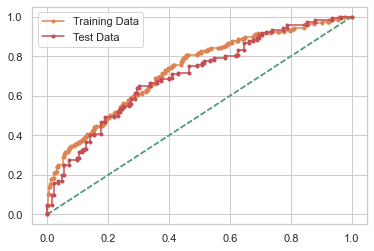

In [150]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# How to change the cut-off values for maximum accuracy?

0.1 

Accuracy Score 0.4721
F1 Score 0.6349 

Confusion Matrix


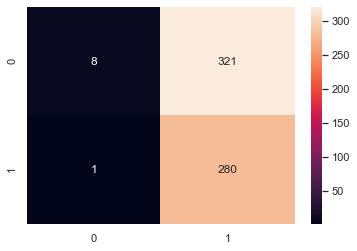

0.2 

Accuracy Score 0.5082
F1 Score 0.6445 

Confusion Matrix


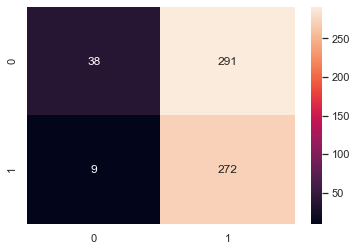

0.3 

Accuracy Score 0.6016
F1 Score 0.6729 

Confusion Matrix


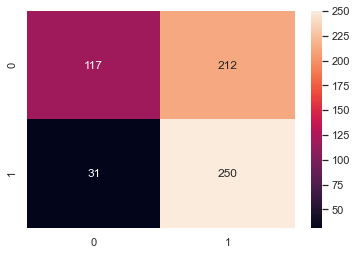

0.4 

Accuracy Score 0.6607
F1 Score 0.6677 

Confusion Matrix


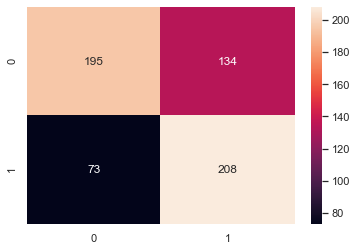

0.5 

Accuracy Score 0.6639
F1 Score 0.6065 

Confusion Matrix


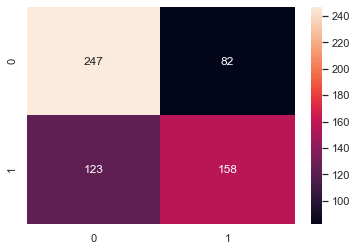

0.6 

Accuracy Score 0.6492
F1 Score 0.518 

Confusion Matrix


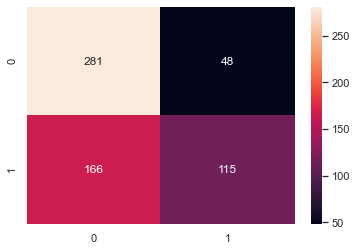

0.7 

Accuracy Score 0.6443
F1 Score 0.4274 

Confusion Matrix


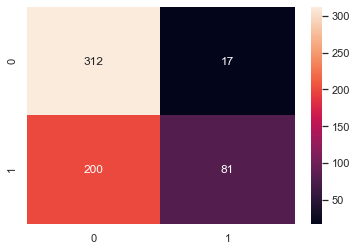

0.8 

Accuracy Score 0.5869
F1 Score 0.1975 

Confusion Matrix


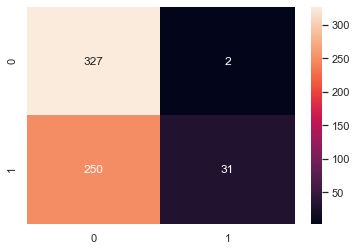

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


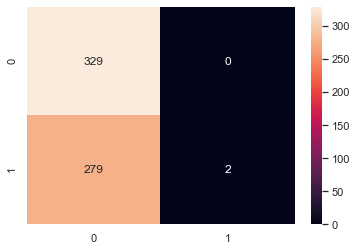

In [151]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the train data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [152]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

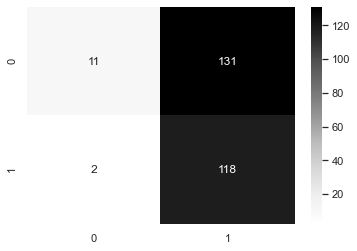

In [153]:
sns.heatmap((metrics.confusion_matrix(Y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [154]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.70       142
           1       0.65      0.51      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.85      0.08      0.14       142
           1       0.47      0.98      0.64       120

    accuracy                           0.49       262
   macro avg       0.66      0.53      0.39       262
weighted avg       0.68      0.49      0.37       262
 



2.4 Inference: Basis on these predictions, what are the insights and recommendations.